### python tips

#### 1.zip函数

zip: 将多个可迭代对象组合成一个元组的可迭代对象，从而非常容易并行循环。

In [98]:
names = ["Alice", "Bob", "Charlie"]
ages = [25, 30, 35]

for i in range(len(names)):
    print(f"{names[i]} is {ages[i]} years old")

Alice is 25 years old
Bob is 30 years old
Charlie is 35 years old


In [99]:
names = ["Alice", "Bob", "Charlie"]
ages = [25, 30, 35]

# 使用 zip 并行遍历两个列表
for name, age in zip(names, ages):
    print(f"{name} is {age} years old")

Alice is 25 years old
Bob is 30 years old
Charlie is 35 years old


#### 2.海象操作符（：=）

海象操作员（ := ）对我来说是一个启示。它允许您将值作为表达式的一部分进行赋值，在一个步骤中将赋值和计算结合起来。这可以使您的代码更加简洁和可读。

In [100]:
while True:
    user_input = input("Enter a number: ")
    if user_input.isdigit():
        number = int(user_input)
        break

In [101]:
while not (user_input := input("Enter a number: ")).isdigit():
    print("Invalid input, please enter a number.")

number = int(user_input)

#### 3.集合的使用

集合是支持并集、交集和差分等数学运算的唯一集合。它们可以有效地处理独特的元素并简化复杂的集合论任务。
我需要找到两个列表的共同点和每个列表的唯一项目。

In [102]:
list1 = [1, 2, 3, 4, 5]
list2 = [4, 5, 6, 7, 8]

# 找到相同元素
common_elements = []
for item in list1:
    if item in list2:
        common_elements.append(item)
print(f"Common elements: {common_elements}")

# 在 list1 中查找唯一元素
unique_to_list1 = []
for item in list1:
    if item not in list2:
        unique_to_list1.append(item)
print(f"Unique to list1: {unique_to_list1}")

# 查找所有独有元素
all_unique_elements = list1.copy()
for item in list2:
    if item not in all_unique_elements:
        all_unique_elements.append(item)
print(f"All unique elements: {all_unique_elements}")

Common elements: [4, 5]
Unique to list1: [1, 2, 3]
All unique elements: [1, 2, 3, 4, 5, 6, 7, 8]


In [103]:
list1 = [1, 2, 3, 4, 5]
list2 = [4, 5, 6, 7, 8]

# 将列表转换为集合
set1 = set(list1)
set2 = set(list2)

# 找出交集（共同点）
common_elements = set1 & set2
print(f"Common elements: {common_elements}")

# 找出差异（集合 1 中的唯一元素）
unique_to_set1 = set1 - set2
print(f"Unique to set1: {unique_to_set1}")

all_unique_elements = set1 | set2
print(f"All unique elements: {all_unique_elements}")

Common elements: {4, 5}
Unique to set1: {1, 2, 3}
All unique elements: {1, 2, 3, 4, 5, 6, 7, 8}


#### 4.使用 * 解包

解包 * 是让我的编码生活变得轻松得多的技巧之一。它允许您将可迭代对象解压缩为函数参数或变量赋值，从而使代码更加灵活和可读。

In [104]:
# 定义一个接收多个参数的函数
def greet(first, second, third):
    print(f"Hello {first}, {second}, and {third}!")

# 名称列表
names = ["Alice", "Bob", "Charlie"]

# 从列表中手动传递参数
greet(names[0], names[1], names[2])

Hello Alice, Bob, and Charlie!


In [105]:
def greet(first, second, third):
    print(f"Hello {first}, {second}, and {third}!")

names = ["Alice", "Bob", "Charlie"]

greet(*names)

Hello Alice, Bob, and Charlie!


#### 5.dataclass模块

该 dataclasses 模块，它以最少的样板自动创建类实例，减少了对手动 init 方法的需求，并使类定义更简洁、更易于维护。

In [106]:
class Person:
    def __init__(self, name, age, city):
        self.name = name
        self.age = age
        self.city = city

person = Person(name="Alice", age=30, city="New York")
print(person)

In [107]:
from dataclasses import dataclass

# 定义一个简单的数据类
@dataclass
class Person:
    name: str
    age: int
    city: str

# 创建该类的实例
person = Person(name="Alice", age=30, city="New York")

print(person)

Person(name='Alice', age=30, city='New York')


#### 6.functools.lru_cache 装饰器

它为函数添加了缓存，存储了函数调用的结果。这加快了具有相同参数的频繁调用的函数的速度，从而显著提高了性能。

In [108]:
from functools import lru_cache

# 定义一个计算量很大的函数
@lru_cache(maxsize=100)
def expensive_function(n):
    print(f"Computing {n}...")
    return n * n

# 多次调用函数
print(expensive_function(4))
print(expensive_function(4)) # 此调用已缓存

Computing 4...
16
16


#### 7.生成器和 yield

生成器是返回可迭代值序列的函数，通过一次生成一个项目并允许延迟计算来节省内存。

In [109]:
def generate_squares(n):
    for i in range(n):
        yield i * i

# 使用生成器
for square in generate_squares(5):
    print(square)

0
1
4
9
16


In [110]:
def generate_squares(n):
    result = []
    for i in range(n):
        result.append(i * i)
    return result

for square in generate_squares(5):
    print(square)

0
1
4
9
16


#### 8.itertools 模块

它提供了一系列快速、节省内存的工具，用于迭代数据。该模块增强了性能，并为处理可迭代对象（如组合、排列和笛卡尔积）提供了强大的工具。

In [111]:
items = ['A', 'B', 'C']
combinations = []

for i in range(len(items)):
    for j in range(i + 1, len(items)):
        combinations.append((items[i], items[j]))

for combo in combinations:
    print(combo)


('A', 'B')
('A', 'C')
('B', 'C')


In [112]:
import itertools

# 生成两个项目的所有可能组合
items = ['A', 'B', 'C']
combinations = itertools.combinations(items, 2)

for combo in combinations:
    print(combo)

('A', 'B')
('A', 'C')
('B', 'C')


#### 9.types.MappingProxyType

我需要保护我的字典免受意外修改时。就在那时，我发现了 types.MappingProxyType .它创建字典的只读视图，确保原始字典保持不变，增加了一层安全性和稳定性。

In [113]:

from types import MappingProxyType

# 原始词典
config = {'host': 'localhost', 'port': 8080}

# 创建只读视图
read_only_config = MappingProxyType(config)

print(read_only_config['host'])  

# 尝试修改只读字典
try:
    read_only_config['host'] = '127.0.0.1'
except TypeError as e:
    print(e)  # Output: 'mappingproxy' object does not support item assignment


localhost
'mappingproxy' object does not support item assignment


#### 10. pathlib 模块

它通过面向对象的方法简化了文件路径操作，使操作更具可读性并降低了出错的风险。它是 os.path 的替代品。我曾经处理 os.path 过我的代码，对于文件操作来说，它经常很混乱，很难阅读。

In [114]:
from pathlib import Path

# 创建路径对象
path = Path(r'C:\Users\fangchi.lu\Documents\Case-study\example_file.txt')

# 检查路径是否存在
if path.exists():
    print(f"{path} exists")
else:
    print(f"{path} does not exist")

# 读取文件中的文本
try:
    content = path.read_text(encoding='utf-8')
    print(content)
except FileNotFoundError:
    print(f"{path} does not exist, cannot read the content.")
except Exception as e:
    print(f"An error occurred while reading the file: {e}")

# 将文本写入文件
try:
    path.write_text('Hello, world!', encoding='utf-8')
    print(f"Text written to {path}")
except Exception as e:
    print(f"An error occurred while writing to the file: {e}")



C:\Users\fangchi.lu\Documents\Case-study\example_file.txt exists
Hello, world!
Text written to C:\Users\fangchi.lu\Documents\Case-study\example_file.txt


In [115]:
import os

path = 'example_file.txt'

# 检查路径是否存在
if os.path.exists(path):
    print(f"{path} exists")

# 从文件中读取文本
with open(path, 'r') as file:
    content = file.read()
    print(content)

# 将文本写入文件
with open(path, 'w') as file:
    file.write('Hello, world!')

example_file.txt exists
Hello, world!


### Topic 1 - Data wrangle

#### Create dataframe

In [267]:
import pandas as pd
import numpy as np

df = pd.DataFrame(
    {"a" : [4, 5, 6], 
    "b" : [7, 8, 9], 
    "c" : [10, 11, 12]}, index = [1, 2, 3])

df = pd.DataFrame(
    [[4, 7, 10],
    [5, 8, 11],
    [6, 9, 12]], index=[1, 2, 3], columns=['a', 'b', 'c'])

df = pd.DataFrame(
    {"a" : [4 ,5, 6], 
    "b" : [7, 8, 9], 
    "c" : [10, 11, 12]}, 
    index = pd.MultiIndex.from_tuples(
        [('d', 1), ('d', 2),('e', 2)], names=['n', 'v']))


#### Change layout - melt

In [268]:
# melt dataframe
df = pd.DataFrame({'Name': ['Bob', 'John', 'Foo', 'Bar', 'Alex', 'Tom'],
                   'Math': ['A+', 'B', 'A', 'F', 'D', 'C'],
                   'English': ['C', 'B', 'B', 'A+', 'F', 'A'],
                   'Age': [13, 16, 16, 15, 15, 13]})
df

,Name,Math,English,Age
0,Bob,A+,C,13
1,John,B,B,16
2,Foo,A,B,16
3,Bar,F,A+,15
4,Alex,D,F,15
5,Tom,C,A,13


In [269]:
# show all name - subject for each classes
df.melt(id_vars=['Name', 'Age'], var_name='Subject', value_name='Grades')

,Name,Age,Subject,Grades
0,Bob,13,Math,A+
1,John,16,Math,B
2,Foo,16,Math,A
3,Bar,15,Math,F
4,Alex,15,Math,D
5,Tom,13,Math,C
6,Bob,13,English,C
7,John,16,English,B
8,Foo,16,English,B
9,Bar,15,English,A+


In [270]:
# show only math classes
df.melt(
        id_vars=["Name", "Age"],
        value_vars="Math",
        var_name="Subject",
        value_name="Grades",
    )

,Name,Age,Subject,Grades
0,Bob,13,Math,A+
1,John,16,Math,B
2,Foo,16,Math,A
3,Bar,15,Math,F
4,Alex,15,Math,D
5,Tom,13,Math,C


In [271]:
df.melt(id_vars=["Name","Age"]).groupby(['value'],as_index=False).agg(lambda x: ','.join(x.astype(str)))[['value','Name','variable']]

,value,Name,variable
0,A,"Foo,Tom","Math,English"
1,A+,"Bob,Bar","Math,English"
2,B,"John,John,Foo","Math,English,English"
3,C,"Tom,Bob","Math,English"
4,D,Alex,Math
5,F,"Bar,Alex","Math,English"


In [272]:
# melt and unmelt
df = df.melt(id_vars=['Name', 'Age'], var_name='Subject', value_name='Grades')

In [273]:
df = df.pivot_table("Grades", ["Name", "Age"], "Subject", aggfunc="first").reset_index().rename_axis(columns=None)

In [274]:
df.melt(id_vars=["Name", "Age"], var_name="Subject", value_name="Grades").groupby(["Name",'Age'], as_index=False).agg(lambda x: ','.join(x.astype(str)))

,Name,Age,Subject,Grades
0,Alex,15,"English,Math","F,D"
1,Bar,15,"English,Math","A+,F"
2,Bob,13,"English,Math","C,A+"
3,Foo,16,"English,Math","B,A"
4,John,16,"English,Math","B,B"
5,Tom,13,"English,Math","A,C"


In [275]:
df.melt().sample(5)

,variable,value
16,English,B
19,Math,F
11,Age,13
4,Name,John
8,Age,13


#### Data sort, rename, index

In [276]:
# data sorting, rename, index
data = {'Name': ['Jai', 'Princi', 'Gaurav', 
                 'Anuj', 'Ravi', 'Natasha', 'Riya'],
        'Age': [15, 13, 18, 17, 18, 17, 17],
        'Gender': ['M', 'F', 'M', 'M', 'M', 'F', 'F'],
        'Marks': [90, 76, 'NaN', 74, 65, 'NaN', 71],
        'Value':[234, 100, 20, 30, 10, 5, -1]}
 
# Convert into DataFrame
df = pd.DataFrame(data)

In [277]:
df.sort_values('Name',ascending=False)

,Name,Age,Gender,Marks,Value
6,Riya,17,F,71,-1
4,Ravi,18,M,65,10
1,Princi,13,F,76,100
5,Natasha,17,F,NaN,5
0,Jai,15,M,90,234
2,Gaurav,18,M,NaN,20
3,Anuj,17,M,74,30


In [278]:
df.rename(columns = {'Value':'Amount'},inplace=True)


In [279]:

df.index=[10,20,30,40,50,60,70]
#reset index of DataFrame to row numbers, moving index to columns
df = df.reset_index()


In [280]:
df.loc[0,'index']

10

In [281]:
df.set_index(['index'])

,Name,Age,Gender,Marks,Amount
index,,,,,
10,Jai,15,M,90,234
20,Princi,13,F,76,100
30,Gaurav,18,M,NaN,20
40,Anuj,17,M,74,30
50,Ravi,18,M,65,10
60,Natasha,17,F,NaN,5
70,Riya,17,F,71,-1


#### Subset operation

In [282]:
#Remove duplicate rows (only considers columns).
df.drop_duplicates(subset=['Age','Gender','Marks'])

,index,Name,Age,Gender,Marks,Amount
0,10,Jai,15,M,90,234
1,20,Princi,13,F,76,100
2,30,Gaurav,18,M,NaN,20
3,40,Anuj,17,M,74,30
4,50,Ravi,18,M,65,10
5,60,Natasha,17,F,NaN,5
6,70,Riya,17,F,71,-1


In [283]:
#Extract rows that meet logical criteria.
df[df.Age > 15]

,index,Name,Age,Gender,Marks,Amount
2,30,Gaurav,18,M,NaN,20
3,40,Anuj,17,M,74,30
4,50,Ravi,18,M,65,10
5,60,Natasha,17,F,NaN,5
6,70,Riya,17,F,71,-1


In [284]:
#sample
print(df.sample(frac=0.2))
print(df.nlargest(5,'Age'))

#query - query() allows Boolean expressions for filtering 
print(df.query('Name.str.startswith("A")', 
engine="python"))
print(df.query('Age < 16 and Amount>100'))

   index    Name  Age Gender Marks  Amount
1     20  Princi   13      F    76     100
   index     Name  Age Gender Marks  Amount
2     30   Gaurav   18      M   NaN      20
4     50     Ravi   18      M    65      10
3     40     Anuj   17      M    74      30
5     60  Natasha   17      F   NaN       5
6     70     Riya   17      F    71      -1
   index  Name  Age Gender Marks  Amount
3     40  Anuj   17      M    74      30
   index Name  Age Gender Marks  Amount
0     10  Jai   15      M    90     234


In [285]:
df[['Name', 'Gender', 'Amount']]

,Name,Gender,Amount
0,Jai,M,234
1,Princi,F,100
2,Gaurav,M,20
3,Anuj,M,30
4,Ravi,M,10
5,Natasha,F,5
6,Riya,F,-1


In [286]:
df.filter(regex ='t$') # select columns ending with t

,Amount
0,234
1,100
2,20
3,30
4,10
5,5
6,-1


In [287]:
df.filter(regex ='^A')

,Age,Amount
0,15,234
1,13,100
2,18,20
3,17,30
4,18,10
5,17,5
6,17,-1


In [288]:
#iloc - index based data selecting method
df.iloc[1:5]


,index,Name,Age,Gender,Marks,Amount
1,20,Princi,13,F,76,100
2,30,Gaurav,18,M,NaN,20
3,40,Anuj,17,M,74,30
4,50,Ravi,18,M,65,10


In [289]:
df.iloc[:, [1, 2, 5]]

,Name,Age,Amount
0,Jai,15,234
1,Princi,13,100
2,Gaurav,18,20
3,Anuj,17,30
4,Ravi,18,10
5,Natasha,17,5
6,Riya,17,-1


In [290]:
# label based data selecting method - pass the name of the row or column which we want to select
df.loc[:, 'Name':'Marks']

,Name,Age,Gender,Marks
0,Jai,15,M,90
1,Princi,13,F,76
2,Gaurav,18,M,NaN
3,Anuj,17,M,74
4,Ravi,18,M,65
5,Natasha,17,F,NaN
6,Riya,17,F,71


In [291]:
df.loc[df['Age'] > 15, ['Age', 'Name']]

,Age,Name
2,18,Gaurav
3,17,Anuj
4,18,Ravi
5,17,Natasha
6,17,Riya


In [292]:
#iat - access single value by index
print(df.iat[1, 2])
print(df.at[4, 'Age']) #Access single value by label

13
18


#### Logic operators

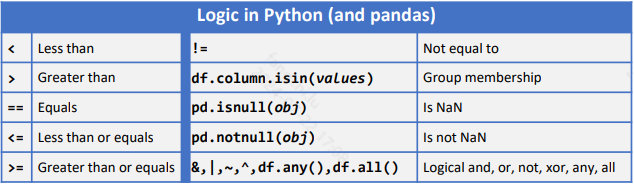

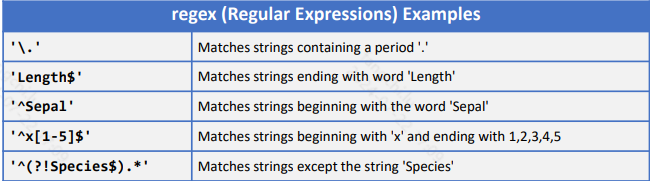

#### Summarize data

In [293]:
df['Age'].value_counts()

Age
17    3
18    2
15    1
13    1
Name: count, dtype: int64

In [294]:
len(df)

7

In [295]:
df.shape

(7, 6)

In [296]:
df['Age'].nunique()

4

In [297]:
df.describe()

,index,Age,Amount
count,7.000000,7.000000,7.000000
mean,40.000000,16.428571,56.857143
std,21.602469,1.812654,85.198647
min,10.000000,13.000000,-1.000000
25%,25.000000,16.000000,7.500000
50%,40.000000,17.000000,20.000000
75%,55.000000,17.500000,65.000000
max,70.000000,18.000000,234.000000


In [298]:
df.Age.mean()

16.428571428571427

In [299]:
df.Name.count()

7

In [300]:
df.Age.quantile([0.25,0.5,0.75])

0.25    16.0
0.50    17.0
0.75    17.5
Name: Age, dtype: float64

In [302]:
df.dtypes

index      int64
Name      object
Age        int64
Gender    object
Marks     object
Amount     int64
dtype: object

In [314]:
# 替换 'NaN' 字符串为真正的 NaN
df['Marks'].replace('NaN', np.nan, inplace=True)

# 将 Marks 列转换为数值类型
df['Marks'] = pd.to_numeric(df['Marks'], errors='coerce')
df.dtypes

index       int64
Name       object
Age         int64
Gender     object
Marks     float64
Amount      int64
dtype: object

In [304]:
df.isna().sum()

index     0
Name      0
Age       0
Gender    0
Marks     2
Amount    0
dtype: int64

In [307]:
df.dropna(axis=0)

,index,Name,Age,Gender,Marks,Amount
0,10,Jai,15,M,90.0,234
1,20,Princi,13,F,76.0,100
3,40,Anuj,17,M,74.0,30
4,50,Ravi,18,M,65.0,10
6,70,Riya,17,F,71.0,-1


In [311]:
df.sum(axis=0)

index                                    280
Name      JaiPrinciGauravAnujRaviNatashaRiya
Age                                      115
Gender                               MFMMMFF
Marks                                  376.0
Amount                                   398
dtype: object

In [312]:
df.min()

index       10
Name      Anuj
Age         13
Gender       F
Marks     65.0
Amount      -1
dtype: object

In [313]:
df.max()

index       70
Name      Riya
Age         18
Gender       M
Marks     90.0
Amount     234
dtype: object

In [315]:
df.fillna(0)

,index,Name,Age,Gender,Marks,Amount
0,10,Jai,15,M,90.0,234
1,20,Princi,13,F,76.0,100
2,30,Gaurav,18,M,0.0,20
3,40,Anuj,17,M,74.0,30
4,50,Ravi,18,M,65.0,10
5,60,Natasha,17,F,0.0,5
6,70,Riya,17,F,71.0,-1
